## **1. Dataset Preparation**

### 1.1 Libraries Used

In [2]:
import math
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier

In [2]:
# # List, combine and save all the data in single csv file
# csv_dir = '../dataset/data_s1'
# csi_files = os.listdir(csv_dir)

# combined_data = pd.DataFrame(columns=['Activity', 'Movement', 'RSSI', 'Raw_CSI'])
# drop_columns = [
#     'Transmit_Timestamp', 'MCS', 'CWB', 'Smoothing', 'Not_Sounding', 'Noise_Floor',
#     'Channel', 'Secondary_Channel', 'Received_Timestamp', 'Antenna', 'Signal_Length',
#     'RX_State', 'Data_Length', 'Time_of_Flight'
# ]

# for csi_file in csi_files:
#     if not csi_file.endswith('.csv'):
#         continue
    
#     csi_data = pd.read_csv(os.path.join(csv_dir, csi_file))
#     csi_data.drop(columns=drop_columns, inplace=True, errors='ignore')
#     # Select a specific range of subcarriers to reduce file size
#     csi_data['Raw_CSI'] = csi_data['Raw_CSI'].apply(lambda x: eval(x)[12:64] + eval(x)[66:118])

#     combined_data = pd.concat([combined_data, csi_data], ignore_index=True)

# combined_data.to_csv('../dataset/data_merged/data_s1.csv', index=False)
# combined_data.shape

In [3]:
# # Use for dataset that doesn't have proper formatting in Raw_CSI
# def add_commas_to_raw_csi(raw_csi_str):
#     raw_csi_str = raw_csi_str.strip('[]')
#     raw_csi_str = raw_csi_str.split()
#     raw_csi_str_with_commas = ', '.join(raw_csi_str)
#     return f'[{raw_csi_str_with_commas}]'

# csv_dir = '../dataset/s1_orig'
# csi_files = os.listdir(csv_dir)

# for csi_file in csi_files:
#     if not csi_file.endswith('.csv'):
#         continue
    
#     csi_data = pd.read_csv(os.path.join(csv_dir, csi_file))
#     csi_data['Raw_CSI'] = csi_data['Raw_CSI'].apply(add_commas_to_raw_csi)
#     csi_data.to_csv(f'../dataset/data_modified/{csi_file}', index=False)

## **2. Dataset Inspection**

In [3]:
csi_df = pd.read_csv('../dataset/data_merged/data_s36.csv')
csi_df.info()
csi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 95 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Activity  2180 non-null   object 
 1   Movement  2180 non-null   int64  
 2   RSSI      2180 non-null   int64  
 3   AM_Std1   2180 non-null   float64
 4   AM_Std2   2180 non-null   float64
 5   AM_Std3   2180 non-null   float64
 6   AM_Std4   2180 non-null   float64
 7   AM_Std5   2180 non-null   float64
 8   AM_Std6   2180 non-null   float64
 9   AM_Std7   2180 non-null   float64
 10  AM_Std8   2180 non-null   float64
 11  AM_Std9   2180 non-null   float64
 12  AM_Std10  2180 non-null   float64
 13  AM_Std11  2180 non-null   float64
 14  AM_Std12  2180 non-null   float64
 15  AM_Std13  2180 non-null   float64
 16  AM_Std14  2180 non-null   float64
 17  AM_Std15  2180 non-null   float64
 18  AM_Std16  2180 non-null   float64
 19  AM_Std17  2180 non-null   float64
 20  AM_Std18  2180 non-null   floa

,Activity,Movement,RSSI,AM_Std1,AM_Std2,AM_Std3,AM_Std4,AM_Std5,AM_Std6,AM_Std7,...,PH_Var14,PH_Var15,PH_Var16,PH_Var17,PH_Var18,PH_Var19,PH_Var20,PH_Var21,PH_Var22,PH_Var23
0,walking,1,-65,6.056271,6.078875,6.101995,6.120244,6.140765,6.161110,6.163881,...,54.027270,57.482989,61.051911,64.732261,68.526796,72.435831,76.467683,80.616697,84.885241,89.269272
1,walking,1,-65,4.602056,4.623219,4.641968,4.658872,4.679023,4.690394,4.686422,...,40.754522,43.304141,45.938078,48.653984,51.450309,54.337489,57.307008,60.364577,63.503423,66.727362
2,walking,1,-67,3.462887,3.471679,3.479888,3.488090,3.502064,3.506591,3.500507,...,32.688262,34.612246,36.598274,38.643506,40.749072,42.917254,45.142126,47.433571,49.784905,52.198434
3,walking,1,-67,4.334343,4.353233,4.372378,4.394125,4.416369,4.438304,4.444929,...,33.532390,35.549060,37.633039,39.780934,41.995271,44.278134,46.625301,49.042014,51.520313,54.064454
4,walking,1,-62,3.050210,3.060679,3.061713,3.059521,3.057884,3.053931,3.046771,...,23.662703,25.070683,26.530430,28.036596,29.585968,31.181952,32.823970,34.518958,36.261581,38.054831


## **3. Dataset Preprocessing**

### 3.1 Compute the amplitude and phase of the CSI data

In [6]:
def compute_csi_amplitude_phase(raw_csi):
    amplitudes = []
    phases = []
    
    # Ensure the data length is even (pairs of I and Q)
    if len(raw_csi) % 2 != 0:
        raise ValueError('CSI data length must be even (pairs of I and Q values).')
    
    for i in range(0, len(raw_csi), 2):
        I = raw_csi[i]
        Q = raw_csi[i + 1]
        
        amplitude = math.sqrt(I**2 + Q**2)
        phase = math.atan2(Q, I)
        
        amplitudes.append(amplitude)
        phases.append(phase)
    
    return amplitudes, phases

# Compute the amplitude and phase of the CSI data
raw_csi = csi_df['Raw_CSI'].apply(eval)

amplitude_phase_data = []

for raw_data in raw_csi:
    amplitudes, phases = compute_csi_amplitude_phase(raw_data)
    amplitude_phase_data.append(amplitudes + phases)

# Create a new DataFrame with amplitude and phase columns
columns = [f'A{i + 1}' for i in range(len(amplitudes))] + [f'P{i + 1}' for i in range(len(phases))]
amplitude_phase_df = pd.DataFrame(amplitude_phase_data, columns=columns)

# Concatenate the new DataFrame with the original DataFrame
csi_df = pd.concat([csi_df, amplitude_phase_df], axis=1)

csi_df.drop(columns='Raw_CSI').head()

,Activity,Movement,RSSI,A1,A2,A3,A4,A5,A6,A7,...,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52
0,walking,1,-65,19.104973,19.849433,18.439089,17.804494,16.401219,15.620499,14.212670,...,3.075024,3.082837,3.086094,3.091634,3.094010,3.050933,3.006065,3.011890,2.969402,2.927532
1,walking,1,-64,7.000000,7.280110,9.848858,11.180340,13.038405,13.601471,14.422205,...,-1.675673,-1.681454,-1.695151,-1.712693,-1.647568,-1.570796,-1.471128,-1.325818,-0.982794,-0.785398
2,walking,1,-65,19.235384,19.235384,17.464249,17.464249,15.524175,14.317821,13.341664,...,-2.199593,-2.214297,-2.191046,-2.203545,-2.214297,-2.253113,-2.259721,-2.293776,-2.325901,-2.356194
3,walking,1,-65,18.110770,18.027756,18.027756,17.029386,16.000000,15.000000,13.000000,...,2.356194,2.403778,2.399645,2.396173,2.393215,2.390664,2.356194,2.323948,2.259721,2.259721
4,walking,1,-64,20.099751,19.235384,19.235384,18.248288,17.262677,16.278821,14.317821,...,-1.508378,-1.515298,-1.518213,-1.520838,-1.523213,-1.525373,-1.570796,-1.614247,-1.614247,-1.653938


In [4]:
csi_df.drop(columns=['Activity','RSSI'], inplace=True)

In [8]:
min_max_scaler = MinMaxScaler((-10, 10))
features = csi_df.drop(columns='Movement').columns
scaled_csi_df = pd.DataFrame(min_max_scaler.fit_transform(csi_df.drop(columns='Movement')), columns=features)
csi_df = pd.concat([scaled_csi_df, csi_df['Movement']], axis=1)
csi_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P44,P45,P46,P47,P48,P49,P50,P51,P52,Movement
0,2.168526,2.553884,2.198217,2.070282,2.182520,2.253728,1.056176,-0.037893,-2.032369,-2.828026,...,9.811777,9.822212,9.840069,9.847731,9.709882,9.566446,9.585081,9.449161,9.315109,1
1,-5.541492,-5.395654,-3.484575,-2.687696,-0.315316,0.669871,1.219175,2.947000,2.474693,4.023969,...,-5.450542,-5.494422,-5.539966,-5.325648,-5.079972,-4.756112,-4.291264,-3.193929,-2.564484,1
2,2.251588,2.165525,1.553320,1.825892,1.531067,1.231823,0.378612,-0.536318,-2.467300,-3.776721,...,-7.157497,-7.083011,-7.111323,-7.139220,-7.263433,-7.278824,-7.387766,-7.490534,-7.590278,1
3,1.535288,1.401754,1.926104,1.513540,1.884502,1.766968,0.112828,-0.665082,-2.504683,-2.998811,...,7.636423,7.623185,7.613698,7.605138,7.596975,7.487508,7.384350,7.178888,7.178433,1
4,2.802130,2.165525,2.724999,2.389049,2.822394,2.770158,1.137974,0.378612,-0.881553,-2.182103,...,-4.918265,-4.927604,-4.925781,-4.927703,-4.934614,-5.074952,-5.213952,-5.213952,-5.343393,1


## **4. Dataset Splitting**

In [5]:
X = csi_df.drop(columns=['Movement'])
y = csi_df['Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_test_shape = pd.DataFrame({
        'Training' : (X_train.shape[0], y_train.shape[0]),
        'Testing' : (X_test.shape[0], y_test.shape[0]),
        'Total' : (X.shape[0], y.shape[0])
    }
)

train_test_shape

,Training,Testing,Total
0,1744,436,2180
1,1744,436,2180


## **5. Model Training**

### 5.1. Baseline Models

In [6]:
log_model = LogisticRegression(
    solver='lbfgs',       # Optimizer
    max_iter=1000,        # Increase iterations for convergence
    random_state=42
)

tree_model = DecisionTreeClassifier(
    max_depth=10,         # Limit depth to avoid overfitting
    min_samples_split=10, # Minimum samples to split a node
    random_state=42
)

neighbor_model = KNeighborsClassifier(
    n_neighbors=5,        # Number of neighbors
    weights='uniform',    # Weighting strategy
    metric='euclidean'    # Distance metric
)

svm_model = SVC(
    kernel='rbf',         # Radial basis function kernel
    C=1.0,                # Regularization parameter
    gamma='scale'         # Kernel coefficient
)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
neighbor_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

### 5.2. Ensemble Models

In [7]:
forest_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=15,         # Maximum depth of trees
    min_samples_split=10, # Minimum samples per split
    random_state=42,
    n_jobs=-1             # Use all available processors
)

decision_tree = DecisionTreeClassifier(random_state=42)
bagged_model = BaggingClassifier(estimator=decision_tree, n_estimators=10, random_state=42)
extra_model = ExtraTreesClassifier(n_estimators=100, max_features=7, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gradient_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

forest_model.fit(X_train, y_train)
bagged_model.fit(X_train, y_train)
extra_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)

c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoostingClassifier(random_state=42)

### 5.3. Multi-Model Models

In [8]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42) # gamma='scale'

# Combine models into a VotingClassifier
vote_model = VotingClassifier(
    estimators=[
        ('logistic', log_clf),
        ('tree', tree_clf),
        ('svm', svm_clf)
    ],
    voting='soft'  # Use probabilities for voting
)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
]

meta_model = LogisticRegression()
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

vote_model.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

## **7. Model Selection**

In [9]:
models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "K-Nearest Neighbors": neighbor_model,
    "Support Vector Machine": svm_model,
    "Random Forest": forest_model,
    "Bagged Decision Trees": bagged_model,
    "Extra Trees": extra_model,
    "AdaBoost": ada_model,
    "Gradient Boosting": gradient_model,
    "Voting Ensemble": vote_model,
    "Stacking Ensemble": stack_model
}

In [10]:
def tabulate_models_results(models):
    results = []

    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        class_report = classification_report(y_test, y_test_pred, output_dict=True)
        cv_scores = cross_val_score(model, X, y, cv=5)

        results.append({
            "Model": name,
            "Training Accuracy": train_acc,
            "Testing Accuracy": test_acc,
            "Precision (0)": class_report["0"]["precision"],
            "Recall (0)": class_report["0"]["recall"],
            "F1-Score (0)": class_report["0"]["f1-score"],
            "Support (0)": class_report["0"]["support"],
            "Precision (1)": class_report["1"]["precision"],
            "Recall (1)": class_report["1"]["recall"],
            "F1-Score (1)": class_report["1"]["f1-score"],
            "Support (1)": class_report["1"]["support"],
            "Cross-Val Mean": cv_scores.mean(),
        })

    results_df = pd.DataFrame(results)
    return results_df

results_df = tabulate_models_results(models)
results_df

c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

,Model,Training Accuracy,Testing Accuracy,Precision (0),Recall (0),F1-Score (0),Support (0),Precision (1),Recall (1),F1-Score (1),Support (1),Cross-Val Mean
0,Logistic Regression,0.810206,0.827982,0.765799,0.944954,0.845996,218.0,0.928144,0.711009,0.805195,218.0,0.750917
1,Decision Tree,0.966170,0.878440,0.863436,0.899083,0.880899,218.0,0.894737,0.857798,0.875878,218.0,0.741743
2,K-Nearest Neighbors,0.947821,0.919725,0.914027,0.926606,0.920273,218.0,0.925581,0.912844,0.919169,218.0,0.636239
3,Support Vector Machine,0.755734,0.798165,0.735507,0.931193,0.821862,218.0,0.906250,0.665138,0.767196,218.0,0.720642
4,Random Forest,0.984518,0.926606,0.926606,0.926606,0.926606,218.0,0.926606,0.926606,0.926606,218.0,0.776606
5,Bagged Decision Trees,0.991399,0.908257,0.897321,0.922018,0.909502,218.0,0.919811,0.894495,0.906977,218.0,0.773853
6,Extra Trees,1.000000,0.931193,0.939252,0.922018,0.930556,218.0,0.923423,0.940367,0.931818,218.0,0.770183
7,AdaBoost,0.920872,0.908257,0.893805,0.926606,0.909910,218.0,0.923810,0.889908,0.906542,218.0,0.806422
8,Gradient Boosting,0.955275,0.922018,0.922018,0.922018,0.922018,218.0,0.922018,0.922018,0.922018,218.0,0.783486
9,Voting Ensemble,0.946674,0.889908,0.872807,0.912844,0.892377,218.0,0.908654,0.866972,0.887324,218.0,0.750917


In [18]:
def print_classification_report(models):
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        print(f'{model_name} Classification Report:')
        print(classification_report(y_test, y_pred))

print_classification_report(models)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2584
           1       0.80      0.75      0.77      2616

    accuracy                           0.78      5200
   macro avg       0.78      0.78      0.78      5200
weighted avg       0.78      0.78      0.78      5200

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2584
           1       0.92      0.82      0.87      2616

    accuracy                           0.88      5200
   macro avg       0.88      0.88      0.88      5200
weighted avg       0.88      0.88      0.88      5200

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2584
           1       0.96      0.82      0.88      2616

    accuracy                           0.89      5200
   ma

### Compute confusion matrix for each model

In [11]:
def tabulate_confusion_matrix(models):
    cm_results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        cm_results.append({
            "Model": name,
            "True Positives": tp,
            "True Negatives": tn,
            "False Positives": fp,
            "False Negatives": fn
        })
    cm_results_df = pd.DataFrame(cm_results)
    return cm_results_df

cm_results_df = tabulate_confusion_matrix(models)
cm_results_df

,Model,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,155,206,12,63
1,Decision Tree,187,196,22,31
2,K-Nearest Neighbors,199,202,16,19
3,Support Vector Machine,145,203,15,73
4,Random Forest,202,202,16,16
5,Bagged Decision Trees,195,201,17,23
6,Extra Trees,205,201,17,13
7,AdaBoost,194,202,16,24
8,Gradient Boosting,201,201,17,17
9,Voting Ensemble,189,199,19,29


## **8. Model Visualization**

### 8.1. Feature Importance for specific model

In [ ]:
def plot_feature_importance(tree_model, X):
    feature_importance = tree_model.feature_importances_
    features = X.columns

    feat = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    feat = feat.sort_values(by='Importance')

    plt.figure(figsize=(10, 6))
    plt.barh(feat['Feature'], feat['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

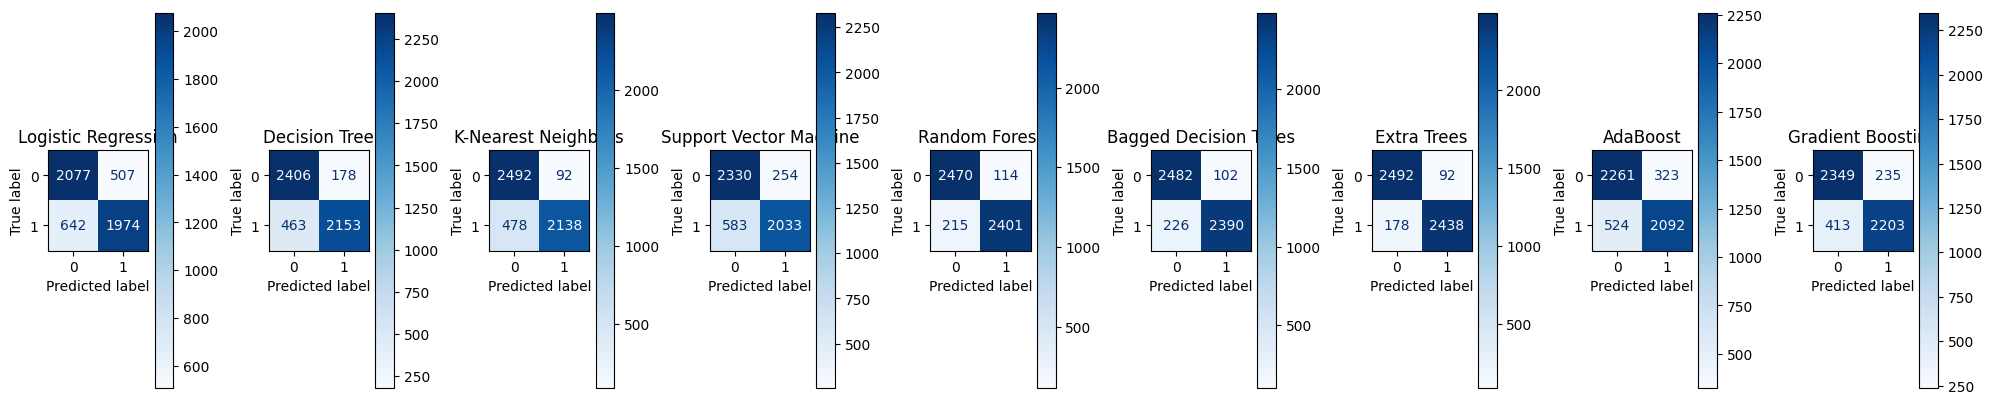

In [20]:
def plot_confusion_matrices(models, X_test, y_test):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(20, 5))

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
        ax.title.set_text(name)

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(models, X_test, y_test)

In [ ]:
# plt.figure(figsize=(10, 5))
# plt.bar(results_df["Model"], results_df["Training Accuracy"], color='skyblue', label='Training')
# plt.bar(results_df["Model"], results_df["Testing Accuracy"], color='orange', alpha=0.7, label='Testing')
# plt.xticks(rotation=45)
# plt.ylabel('Accuracy')
# plt.title('Model Training and Testing Accuracy')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# x = np.arange(len(results_df))
# width = 0.2

# plt.figure(figsize=(12, 6))
# plt.bar(x - width, results_df["Precision (1)"], width, label='Precision (Class 1)', color='teal')
# plt.bar(x, results_df["Recall (1)"], width, label='Recall (Class 1)', color='gold')
# plt.bar(x + width, results_df["F1-Score (1)"], width, label='F1-Score (Class 1)', color='crimson')

# plt.xticks(x, results_df["Model"], rotation=45)
# plt.ylabel('Score')
# plt.title('Precision, Recall, F1-Score (Class 1) Comparison')
# plt.legend()
# plt.tight_layout()
# plt.show()